In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78163975/how-can-i-fit-data-to-a-lennard-jones-potential-in-gnuplot

In [2]:
data = pd.read_csv(io.StringIO("""1 20.6711
1.1 12.8327
1.2 6.70081
1.3 2.56984
1.4 -0.0348628
1.5 -1.50733
1.6 -2.21619
1.7 -2.41084
1.8 -2.29524
1.9 -2.02128
2 -1.76153
2.1 -1.47329
2.2 -1.21735
2.3 -0.986853
2.4 -0.786588
2.5 -0.602345
2.6 -0.442397
2.7 -0.314293
2.8 -0.208958
2.9 -0.121526
3 -0.16448
4 -0.0488864
5 0
6 0.0207913
7 0.0275973
8 0.186272
9 0.0402228
10 0.0421324"""), sep=" ", header=None, names=["r", "V"])

In [3]:
data["s"] = 1 / (data.V**4 + 1)

In [4]:
def model(r, epsilon, sigma):
    return 4. * epsilon * (np.power(sigma / r, 12.) - np.power(sigma / r, 6.))

In [5]:
s = 1.6 / np.power(2, 1/6)
s

1.425437949024543

In [6]:
p = [2.43, 1.39]

In [7]:
popt, pcov = optimize.curve_fit(
    model, data.r, data.V, sigma=data.s, p0=p,
    max_nfev=3000, bounds=[(0., 0.), (np.inf, np.inf)]
)
popt, pcov

(array([6.55356455e-11, 8.09366946e+00]),
 array([[3.30795891e-25, 3.21421023e-35],
        [3.21421023e-35, 3.12311842e-45]]))

In [8]:
def factory(x, y):
    def wrapped(p):
        return y - model(x, *p)
    return wrapped

In [9]:
residuals = factory(data.r.values, data.V.values)

In [10]:
sol = optimize.least_squares(residuals, x0=p, loss="cauchy", bounds=[(0, 0), (np.inf, np.inf)])

In [11]:
rlin = np.linspace(data.r.min(), data.r.max(), 201)
yhat = model(rlin, *popt)

In [12]:
yg = model(rlin, *p)

In [13]:
yhat2 = model(rlin, *sol.x)

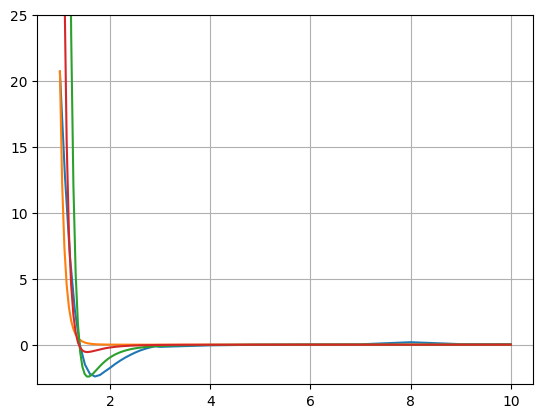

In [14]:
fig, axe = plt.subplots()
axe.plot(data.r, data.V)
axe.plot(rlin, yhat)
axe.plot(rlin, yg)
axe.plot(rlin, yhat2)
axe.set_ylim([-3, 25])
axe.grid()